$\textbf{Problem 2.}$ $\hspace{2mm}$ For the body fat dataset, we wish to examine whether there are outliers. Use $r_i$, 
the  internally  studentized  residual, and $t_i$,  the  externally  studentized  residual,
what conclusion can you draw, respectively?

NOTE 

I see that some people enter the data manually. 

I explain the problem with reading the dataset and how to solve it in the solution of Problem 3.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('bodyfat.txt', delimiter='\s+')

X1 = data[['X1']]
X2 = data[['X2']]
X_points = data[['X1', 'X2']] 
Y = data['Y']

$\textbf{Answer:}$ $\hspace{2mm}$

We calculate hat matrix $H = X (X^T X)^{-1} X^T$ and residual vector of $e_i$'s as we did in Problem 1.  

In [ ]:
ones_column_1 = np.ones((X_points.shape[0], 1))  # Create a column of ones.
X = np.hstack((ones_column_1, X_points))  # Create design matrix X.

H = X @ np.linalg.pinv(X.T @ X) @ X.T  # Calculate hat matrix H.
Y_hat = np.matmul(H, Y)   # We know that H is the projection matrix and Y_hat = H.Y
residual = Y-Y_hat   # find the vector of residuals.

Note that $n$ is the number data points and  $p = 2$ is the number of predictors.

We first calculate the sum of squared errors $SSE$.

Then, we calculate the vectors $r$, $t$ of internally and externally  studentized  residuals $r_i$ and $t_i$, respectively.

In [42]:
n = len(Y)
p = 2

SSE = np.sum(np.multiply(residual, residual))  # sum of squared errors

sigma_squared = SSE/(n-2+1)   # \hat(sigma)^2
sigma = np.sqrt(sigma_squared)

# Calculate internally and externally  studentized  residual vectors
r = []
t = []
for idx, i in enumerate(residual):
  r_i = i/(sigma*np.sqrt(1-H[idx][idx]))
  r.append(r_i)
  t_i = r_i*np.sqrt((n-p-2)/(n-p-1-(r_i**2)))
  t.append(t_i)

Let's plot them together. 

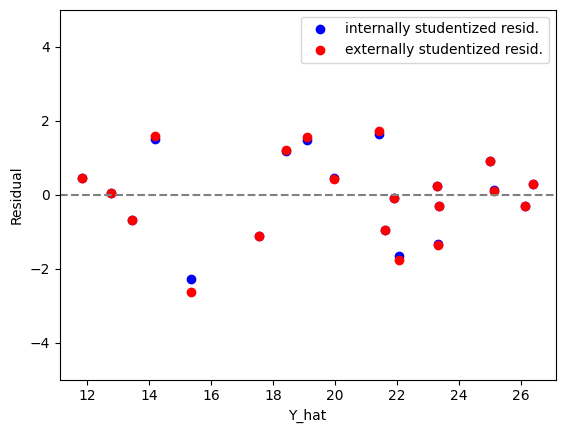

In [30]:
# Plot Y_hat & r and Y_hat & t together.
plt.plot(Y_hat, r, 'o', color='blue', label="internally studentized resid.")
plt.plot(Y_hat, t, 'o', color='red', label="externally studentized resid.")
plt.axhline(y = 0, color = 'gray', linestyle = '--')

plt.ylim([-5, 5])

plt.xlabel("Y_hat")
plt.ylabel("Residual")
plt.legend(loc=0)

plt.show() 

Following codes give the observation numbers of the potential outliers in the data. We add 1 to idx in the print line, since indexing of data points starts from 0 in python. 

In [43]:
for idx, (residual, t_value) in enumerate(zip(r, t)):
    if abs(residual) >= 2 or abs(t_value) >= 2:
        print("Observation number:", idx + 1)

Observation number: 13


The index corresponding to that observation is $i=12$. We find the values of predictors of the 13.th data point $X_{13}=(X_1,X_2)$ and its observation value $Y_{13}$ as follows.

In [41]:
potential_outlier = (X[12],Y[12])
print(potential_outlier)

(array([ 1. , 18.7, 46.5]), 10.1)


The point $(X_1, X_2, Y_{13})=(18.7, 46.5, 10.1)$ is a potential outlier, which has the largest residual and largest difference in internal and external studentized residual.